In [60]:
# Loading libraries for python
%matplotlib inline
%pylab inline


import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Advanced data visualization
import re # Regular expressions for advanced string selection
import missingno as msno # Advanced missing values handling
import pandas_profiling # Advanced exploratory data analysis
from scipy import stats # Advanced statistical library
sns.set()
from pylab import rcParams
from scipy import stats # statistical operations
import warnings
warnings.filterwarnings("ignore");

# changing graph style following best practices from Storyteling with Data from Cole Knaflic [3]
sns.set(font_scale=2.5);
sns.set_style("whitegrid");

Populating the interactive namespace from numpy and matplotlib


In [61]:
# Reading data parsing dates in correct format for users DataFrame
engagement = pd.read_csv("Resources/engagement.csv")
users = pd.read_csv("resources/users.csv", parse_dates=['registration'], infer_datetime_format=True)

# EDA

In [62]:
engagement.describe(include="all").drop(['user_id'], axis=1)

,browser,program,hrs_per_week
count,88874,88874,88874.000000
unique,5,2,NaN
top,Chrome,drip,NaN
freq,38626,44503,NaN
mean,NaN,NaN,4.601871
std,NaN,NaN,2.529182
min,NaN,NaN,0.000000
25%,NaN,NaN,2.700000
50%,NaN,NaN,4.510000
75%,NaN,NaN,6.300000


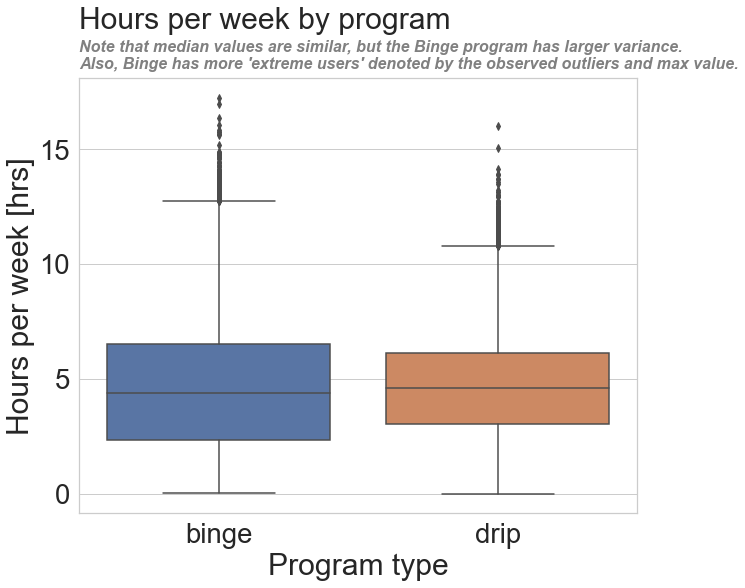

In [63]:
# Let's have a macro view of the hours per week by program
fig1 = sns.boxplot(x='program', y='hrs_per_week', data=engagement);

# All visualizations will follow a similar styling following best practices from Storytelling with Data [3][8][9]
fig1 = plt.gcf()
fig1.set_size_inches(10, 8)
plt.title('Hours per week by program', loc='left', y=1.1);
plt.ylabel("Hours per week [hrs]");
plt.xlabel("Program type");
plt.text(-0.5, 18.5, "Note that median values are similar, but the Binge program has larger variance.\nAlso, Binge has more 'extreme users' denoted by the observed outliers and max value.", fontsize=16, color='grey', style='italic', weight='semibold',);
plt.plot();

In [64]:
# Checking mean hours per week per program
engagement.groupby(['program']).mean()[['hrs_per_week']]

,hrs_per_week
program,
binge,4.605888
drip,4.597865


In [65]:
# Joining the tables on User_ID for hrs_per_week by country and checking by possible nulls
# Merging on user_is and adding a simple year column for aggregations
df = pd.merge(engagement, users, on='user_id')
df['year'] = df.registration.dt.year
df
# Checking for null values and exploring further using missingno library
#df.isnull().sum()
#msno.bar(df);

,user_id,browser,program,hrs_per_week,registration,country,year
0,769245,IE,binge,4.91,2015-11-20,Germany,2015
1,21650570,Safari,binge,3.97,2016-01-12,France,2016
2,91760162,Chrome,drip,3.55,2016-03-21,France,2016
3,90748752,Chrome,drip,5.46,2016-03-17,France,2016
4,66876824,Chrome,binge,3.87,2016-04-01,Germany,2016
...,...,...,...,...,...,...,...
88869,77712477,Chrome,drip,3.96,2016-03-01,France,2016
88870,71724217,Safari,drip,3.73,2016-05-06,Germany,2016
88871,69155165,Chrome,drip,2.98,2015-11-02,Germany,2015
88872,34336713,Opera,binge,0.24,2016-06-02,Germany,2016


# checking missing values

In [66]:
df.isnull().sum()

user_id         0
browser         0
program         0
hrs_per_week    0
registration    0
country         0
year            0
dtype: int64

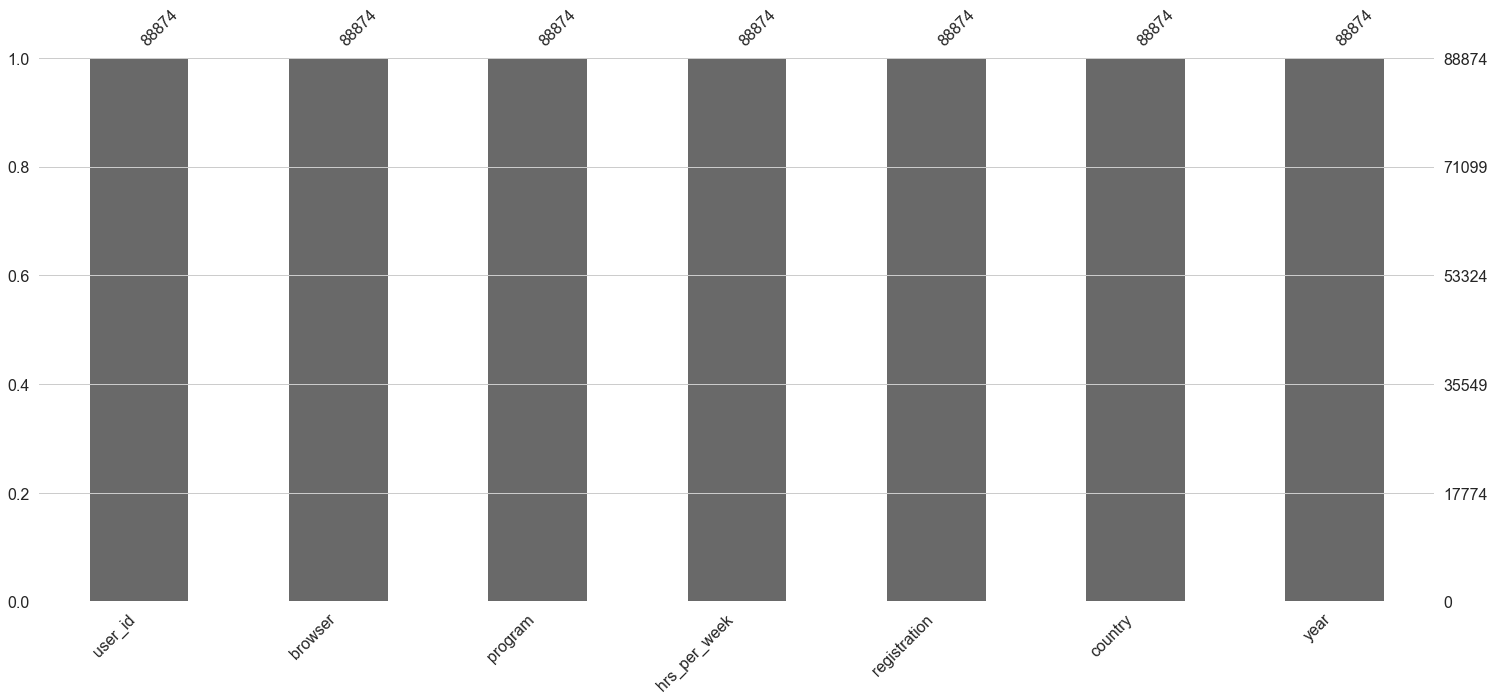

In [67]:

msno.bar(df);

# Comparing Both Program

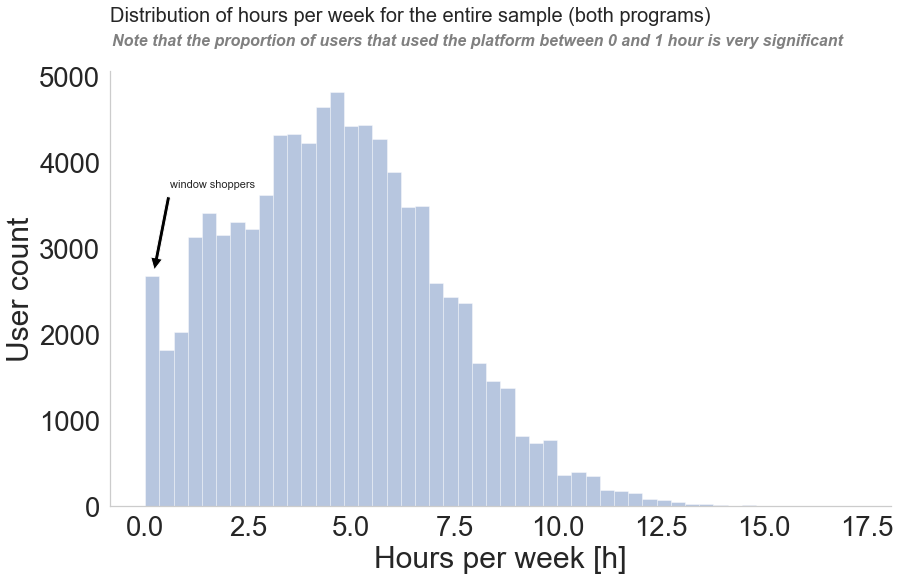

In [68]:
# Checking engagement distribution for the entire sample (both programs)
fig, ax = plt.subplots()
fig = sns.distplot(df.hrs_per_week, kde=False)
fig.grid(False)
fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.title("Distribution of hours per week for the entire sample (both programs)", loc="left", y=1.1, fontsize=20);
plt.text(-0.8, 5350, "Note that the proportion of users that used the platform between 0 and 1 hour is very significant", fontsize=16, color='grey', style='italic', weight='semibold',);
plt.ylabel("User count");
plt.xlabel("Hours per week [h]");
sns.despine(left=False);
ax.annotate('window shoppers', xy=(0.2, 2700), xytext=(0.6, 3700), fontsize=11,
            arrowprops=dict(facecolor='black', shrink=0.05));
plt.plot();

In [69]:
# User distributions per country
# Not much of a difference on the aggregate view;
# On the granular view (by program by country), we have once again the conclusion of extreme users in favor to the Binge program;
# However, still on the granular view, all medians are higher for the Drip program while standard deviations are lower, indicating a more regular community.
df.groupby(['country', 'program']).agg({'hrs_per_week':[np.mean, np.std]})

hrs_per_week          
                        mean       std
country program                       
France  binge       4.596582  2.759918
        drip        4.592999  2.261194
Germany binge       4.622154  2.764568
        drip        4.599495  2.274150
Italy   binge       4.544733  2.778293
        drip        4.611353  2.302292

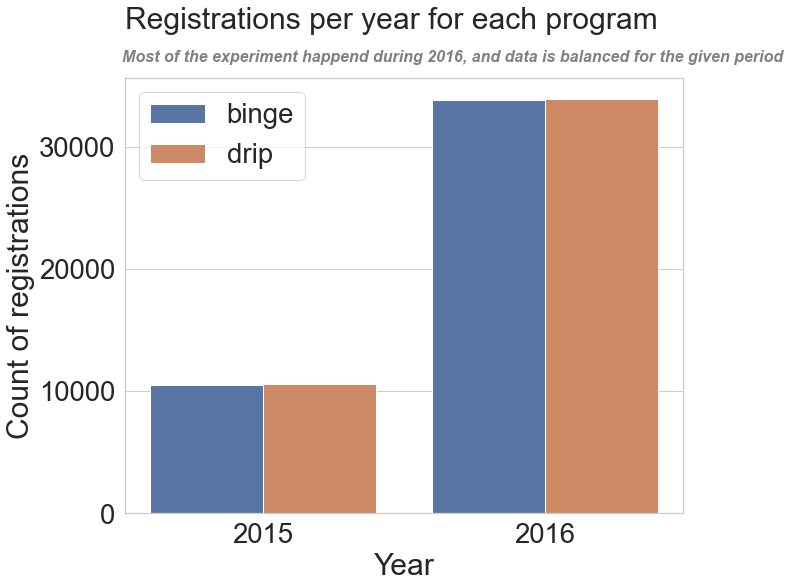

In [70]:
# Let's check the program distribution for the given period
sns.countplot(x='year', hue='program', data=df);
fig2 = plt.gcf()
fig2.set_size_inches(10, 8)
plt.title('Registrations per year for each program', loc="left", y=1.1);
plt.text(-0.5, 37000, 'Most of the experiment happend during 2016, and data is balanced for the given period', fontsize=16, color='grey', style='italic', weight='semibold',);
plt.legend(loc=0);
plt.ylabel("Count of registrations");
plt.xlabel("Year");
plt.plot();

In [71]:
# Checking the distribution of registered users throughout the period of analysis
pivot_table = pd.pivot_table(df, index=['country', 'program'], columns='year', aggfunc=np.count_nonzero, values=['registration'], margins=True, )
pivot_table

# Distribution of registered users by country throughout the period of analysis
#sns.catplot('country', col="year", col_wrap=2, hue='program', data=df, kind="count", height=11, aspect=.6);

registration              
year                    2015   2016    All
country program                           
France  binge           4199  13413  17612
        drip            4222  13531  17753
Germany binge           5478  17776  23254
        drip            5492  17652  23144
Italy   binge            867   2638   3505
        drip             868   2738   3606
All                    21126  67748  88874

In [72]:
# drip = df1.loc[df1['program'] != 'binge']
# binge = df1.loc[df1['program'] == 'binge']

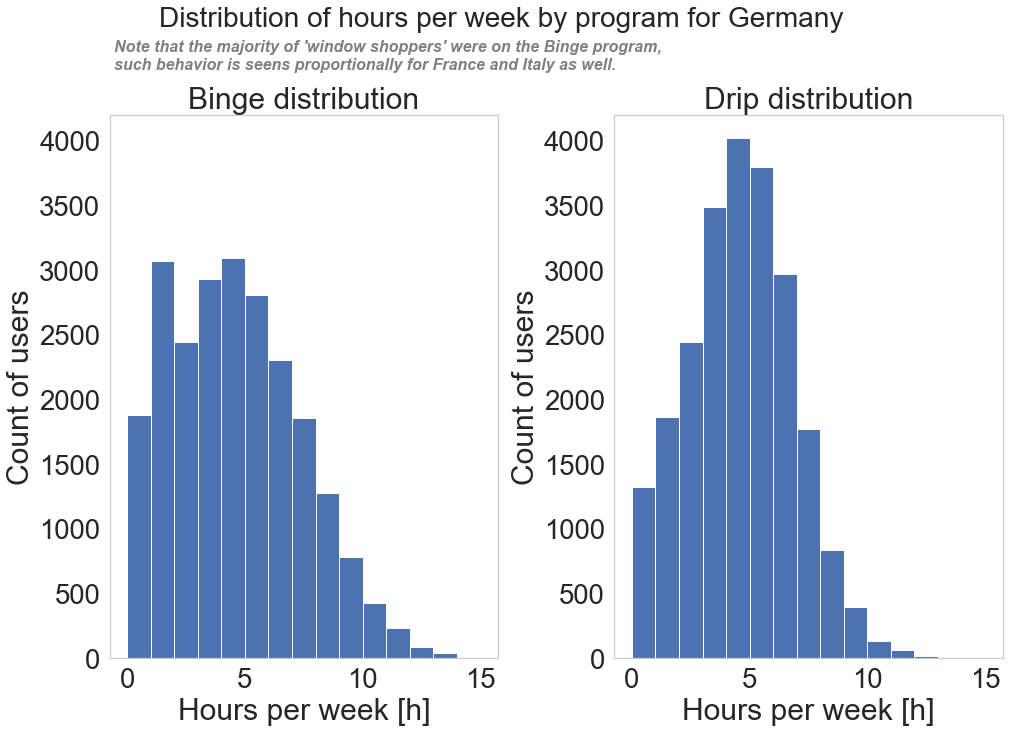

In [73]:
# Histograms for both program types so we can see how many "window shoppers" each one had before eliminating them

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
fig, ax = plt.subplots(1, 2)
df.loc[(df.program == 'binge') & (df.country == 'Germany'), ['hrs_per_week']].hist(bins=bins, ax=ax[0]);
df.loc[(df.program == 'drip') & (df.country == 'Germany'), ['hrs_per_week']].hist(bins=bins, ax=ax[1]);
ax[0].set_ylim([0, 4200])
ax[0].set_title("Binge distribution")
ax[0].grid(False)
ax[1].set_ylim([0, 4200])
ax[1].set_title("Drip distribution")
ax[1].grid(False)
for i in ax.flat:
    i.set(xlabel='Hours per week [h]', ylabel='Count of users')
fig.suptitle("Distribution of hours per week by program for Germany", fontsize=28, x=0.465, y=1.03);
plt.text(-22, 4550, "Note that the majority of 'window shoppers' were on the Binge program, \nsuch behavior is seens proportionally for France and Italy as well.", fontsize=16, color='grey', style='italic', weight='semibold',);
fig.set_size_inches(16, 10)
plt.plot();

In [74]:
# Checking summary statistics between programs after removing window shoppers
df_eval0 = df.loc[df.hrs_per_week > 1].groupby(['program']).agg({'hrs_per_week':[np.mean, np.std], 'registration':np.count_nonzero})
df_eval0.columns.set_levels(['sample size (n)','mean','std.dev'],level=1,inplace=True)
df_eval0

hrs_per_week              registration
                mean   std.dev sample size (n)
program                                       
binge       4.976966  2.582060           40683
drip        4.857204  2.071311           41955

In [75]:
# Checking summary statistics between programs for every country after removing window shoppers
df_eval1 = df.loc[df.hrs_per_week > 1].groupby(['country', 'program']).agg({'hrs_per_week':[np.mean, np.std], 'registration':np.count_nonzero})
df_eval1.columns.set_levels(['sample size (n)','mean','std.dev'],level=1,inplace=True)
df_eval1

hrs_per_week              registration
                        mean   std.dev sample size (n)
country program                                       
France  binge       4.973187  2.574976           16126
        drip        4.845466  2.066307           16760
Germany binge       4.986529  2.585866           21357
        drip        4.860439  2.073344           21811
Italy   binge       4.932188  2.592560            3200
        drip        4.894489  2.083022            3384

# 0utliers

In [76]:
df

,user_id,browser,program,hrs_per_week,registration,country,year
0,769245,IE,binge,4.91,2015-11-20,Germany,2015
1,21650570,Safari,binge,3.97,2016-01-12,France,2016
2,91760162,Chrome,drip,3.55,2016-03-21,France,2016
3,90748752,Chrome,drip,5.46,2016-03-17,France,2016
4,66876824,Chrome,binge,3.87,2016-04-01,Germany,2016
...,...,...,...,...,...,...,...
88869,77712477,Chrome,drip,3.96,2016-03-01,France,2016
88870,71724217,Safari,drip,3.73,2016-05-06,Germany,2016
88871,69155165,Chrome,drip,2.98,2015-11-02,Germany,2015
88872,34336713,Opera,binge,0.24,2016-06-02,Germany,2016


In [77]:
# drop columns User_id and year and Registration
df1 = df.drop(['user_id','registration','year'], axis=1)
df1

,browser,program,hrs_per_week,country
0,IE,binge,4.91,Germany
1,Safari,binge,3.97,France
2,Chrome,drip,3.55,France
3,Chrome,drip,5.46,France
4,Chrome,binge,3.87,Germany
...,...,...,...,...
88869,Chrome,drip,3.96,France
88870,Safari,drip,3.73,Germany
88871,Chrome,drip,2.98,Germany
88872,Opera,binge,0.24,Germany


In [78]:
df1['program'].value_counts()# 1    44503   ,0    44371

drip     44503
binge    44371
Name: program, dtype: int64

In [79]:
#df1['program'].value_counts(normalize=True)

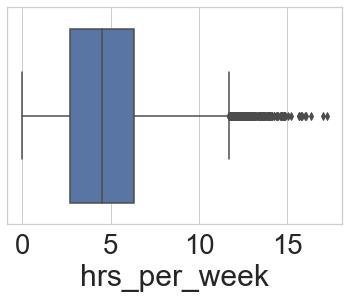

In [80]:
import seaborn as sns
sns.boxplot(x = df1["hrs_per_week"]);

In [83]:
Q1 = df1.hrs_per_week.quantile(0.25)
Q3 = df1.hrs_per_week.quantile(0.75)
IQR = Q3-Q1
print(round(IQR,2))

3.6


In [84]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(round(lower,2))
print(round(upper,2))

-2.7
11.7


In [87]:
df3= df1[~((df1['hrs_per_week']<= lower) | (df1['hrs_per_week']>= upper))]

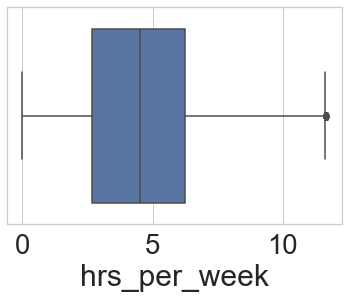

In [88]:
import seaborn as sns
sns.boxplot(x = df3["hrs_per_week"]);

In [90]:
df3

,browser,program,hrs_per_week,country
0,IE,binge,4.91,Germany
1,Safari,binge,3.97,France
2,Chrome,drip,3.55,France
3,Chrome,drip,5.46,France
4,Chrome,binge,3.87,Germany
...,...,...,...,...
88869,Chrome,drip,3.96,France
88870,Safari,drip,3.73,Germany
88871,Chrome,drip,2.98,Germany
88872,Opera,binge,0.24,Germany


# Dummy variable

In [91]:
df2  = pd.get_dummies(df1, columns =['country', 'browser', 'program'])
df2.head()

,hrs_per_week,country_France,country_Germany,country_Italy,browser_Chrome,browser_Firefox,browser_IE,browser_Opera,browser_Safari,program_binge,program_drip
0,4.91,0,1,0,0,0,1,0,0,1,0
1,3.97,1,0,0,0,0,0,0,1,1,0
2,3.55,1,0,0,1,0,0,0,0,0,1
3,5.46,1,0,0,1,0,0,0,0,0,1
4,3.87,0,1,0,1,0,0,0,0,1,0


In [92]:
df3 = df2.drop("program_binge", axis=1)
df3

,hrs_per_week,country_France,country_Germany,country_Italy,browser_Chrome,browser_Firefox,browser_IE,browser_Opera,browser_Safari,program_drip
0,4.91,0,1,0,0,0,1,0,0,0
1,3.97,1,0,0,0,0,0,0,1,0
2,3.55,1,0,0,1,0,0,0,0,1
3,5.46,1,0,0,1,0,0,0,0,1
4,3.87,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
88869,3.96,1,0,0,1,0,0,0,0,1
88870,3.73,0,1,0,0,0,0,0,1,1
88871,2.98,0,1,0,1,0,0,0,0,1
88872,0.24,0,1,0,0,0,0,1,0,0


# Machine Learning Model

In [93]:
X = df3.drop(["program_drip"], axis=1)
X.head()

,hrs_per_week,country_France,country_Germany,country_Italy,browser_Chrome,browser_Firefox,browser_IE,browser_Opera,browser_Safari
0,4.91,0,1,0,0,0,1,0,0
1,3.97,1,0,0,0,0,0,0,1
2,3.55,1,0,0,1,0,0,0,0
3,5.46,1,0,0,1,0,0,0,0
4,3.87,0,1,0,1,0,0,0,0


In [94]:
X.shape

(88874, 9)

In [95]:
y = df3["program_drip"]
y.head()

0    0
1    0
2    1
3    1
4    0
Name: program_drip, dtype: uint8

In [96]:
y.shape

(88874,)

In [97]:
y.value_counts()

1    44503
0    44371
Name: program_drip, dtype: int64

# Split our data into training and testing data

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# DummyClassifier

In [99]:
# Dummy Classifier
from sklearn.dummy import DummyClassifier
dummy_frequent_clf = DummyClassifier(strategy="most_frequent")
dummy_frequent_clf.fit(X_test, y_test)

DummyClassifier(strategy='most_frequent')

In [100]:
y_pred =dummy_frequent_clf.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]


In [101]:
score_train = dummy_frequent_clf.score(X_train, y_train)
score_test = dummy_frequent_clf.score(X_test, y_test)
print('The training fraction of correct classifications is: {:5.3f}'.format(score_train))
print('The testing fraction of correct classifications is: {:5.3f}'.format(score_test))

The training fraction of correct classifications is: 0.500
The testing fraction of correct classifications is: 0.504


In [102]:
# Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
CM = confusion_matrix(y_test,y_pred)
CM

array([[    0, 11029],
       [    0, 11190]], dtype=int64)

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11029
           1       0.50      1.00      0.67     11190

    accuracy                           0.50     22219
   macro avg       0.25      0.50      0.33     22219
weighted avg       0.25      0.50      0.34     22219



In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [105]:
# Import the model
from sklearn.linear_model import LogisticRegression
# Instantiate a logistic regression model
classifier = LogisticRegression(max_iter=10000)
# Train the Model we use fit () 
classifier.fit(X_train_scaled, y_train)
# validate the model we use predict()
y_pred = classifier.predict(X_test_scaled)

In [106]:
lr_CM = confusion_matrix(y_test,y_pred)
lr_CM

array([[4854, 6175],
       [5048, 6142]], dtype=int64)

In [107]:
# Create a DataFrame from the confusion matrix.
lr_df = pd.DataFrame(
    lr_CM, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

lr_df

,Predicted 0,Predicted 1
Actual 0,4854,6175
Actual 1,5048,6142


In [108]:

target_names = ["negative", "positive"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.49      0.44      0.46     11029
    positive       0.50      0.55      0.52     11190

    accuracy                           0.49     22219
   macro avg       0.49      0.49      0.49     22219
weighted avg       0.49      0.49      0.49     22219



In [109]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.5028429975245668
Testing Data Score: 0.49489175930509927


# RandomForestClassifier

In [110]:
# Import a Random Forests classifier
from sklearn.ensemble import RandomForestClassifier
# Fit a model, and then print a classification report
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

    negative       0.54      0.51      0.52     11029
    positive       0.54      0.57      0.56     11190

    accuracy                           0.54     22219
   macro avg       0.54      0.54      0.54     22219
weighted avg       0.54      0.54      0.54     22219

Training Score: 0.6757782611957093
Testing Score: 0.5396732526216301


# AdaBoostClassifier

In [111]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=1).fit(X_train_scaled, y_train)
clf

AdaBoostClassifier(random_state=1)

In [112]:
adb_cm = confusion_matrix(y_test, y_pred)
adb_cm

array([[5588, 5441],
       [4787, 6403]], dtype=int64)

In [113]:
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

    negative       0.54      0.51      0.52     11029
    positive       0.54      0.57      0.56     11190

    accuracy                           0.54     22219
   macro avg       0.54      0.54      0.54     22219
weighted avg       0.54      0.54      0.54     22219

Training Score: 0.5873677893631386
Testing Score: 0.5812592825959764


In [114]:
from sklearn.tree import DecisionTreeClassifier

clf =DecisionTreeClassifier(criterion='entropy', random_state=45  , max_depth=4)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

    negative       0.65      0.35      0.45     11029
    positive       0.56      0.82      0.66     11190

    accuracy                           0.58     22219
   macro avg       0.60      0.58      0.56     22219
weighted avg       0.60      0.58      0.56     22219

Training Score: 0.5870827394794089
Testing Score: 0.5824294522705792


In [115]:
# Import an Extremely Random Trees classifier
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=1)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

    negative       0.53      0.56      0.55     11029
    positive       0.55      0.52      0.53     11190

    accuracy                           0.54     22219
   macro avg       0.54      0.54      0.54     22219
weighted avg       0.54      0.54      0.54     22219

Training Score: 0.6758232690720876
Testing Score: 0.5398982852513614


In [116]:
#%%time       

In [118]:
print("Saba Amin")

Saba Amin
